In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

gerando gráficos no momento da chamada da função, sem precisar do uso do método show():

In [170]:
%matplotlib inline

lendo arquivo csv:

In [197]:
df = pd.read_csv('data.csv', sep = ';')

mostrando dados:

In [172]:
df

,regiao,estado,data,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
0,Norte,RO,30/01/2020,0,0,0,0
1,Norte,RO,31/01/2020,0,0,0,0
2,Norte,RO,01/02/2020,0,0,0,0
3,Norte,RO,02/02/2020,0,0,0,0
4,Norte,RO,03/02/2020,0,0,0,0
...,...,...,...,...,...,...,...
1777,Centro-Oeste,DF,31/03/2020,20,332,2,3
1778,Centro-Oeste,DF,01/04/2020,23,355,0,3
1779,Centro-Oeste,DF,02/04/2020,15,370,1,4
1780,Centro-Oeste,DF,03/04/2020,32,402,1,5


campos:

In [204]:
df.columns

Index(['regiao', 'estado', 'data', 'casosNovos', 'casosAcumulados',
       'obitosNovos', 'obitosAcumulados'],
      dtype='object')

Definindo função para retorno de dados onde o campo selecionado é igual a dado valor:

In [173]:
def records_by_fields(field, value):
    return df[df[field] == value]

In [174]:
records_by_fields('estado','RO')

,regiao,estado,data,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
0,Norte,RO,30/01/2020,0,0,0,0
1,Norte,RO,31/01/2020,0,0,0,0
2,Norte,RO,01/02/2020,0,0,0,0
3,Norte,RO,02/02/2020,0,0,0,0
4,Norte,RO,03/02/2020,0,0,0,0
...,...,...,...,...,...,...,...
61,Norte,RO,31/03/2020,2,8,1,1
62,Norte,RO,01/04/2020,1,9,0,1
63,Norte,RO,02/04/2020,1,10,0,1
64,Norte,RO,03/04/2020,0,10,0,1


Retorno do total de casos por campo de interesse:

In [205]:
def total_cases_by_field(field):
    return df.groupby(field)['casosNovos'].sum()

Total de casos por região:

In [176]:
total_cases_by_field('regiao')

regiao
Centro-Oeste     675
Nordeste        1642
Norte            527
Sudeste         6295
Sul             1139
Name: casosNovos, dtype: int64

Definição do retorno do total de casos, total de mortes e taxa de letalidade:

In [188]:
def total_cases():
    return df['casosNovos'].sum()
def total_death():
    return df['obitosNovos'].sum()
def lethality():
    return (total_death()/total_cases())

In [189]:
[total_cases(), total_death(), lethality()]

[10278, 432, 0.04203152364273205]

Retornando registros onde o números de casos em um dia foi maior ou igual que o valor passado como parâmetro:

In [179]:
def cases_in_day_greater_than_x_by_state(value):
    return df[df['casosNovos'] >= value]

In [180]:
cases_in_day_greater_than_x_by_state(300)

,regiao,estado,data,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
1315,Sudeste,SP,31/03/2020,822,2339,23,136
1316,Sudeste,SP,01/04/2020,642,2981,28,164
1317,Sudeste,SP,02/04/2020,525,3506,24,188
1318,Sudeste,SP,03/04/2020,542,4048,31,219
1319,Sudeste,SP,04/04/2020,418,4466,41,260


Definição de funções de geração de gráficos de acordo com parâmetros estipulados:

In [190]:
def x_ticks_values():
    text_x_ticks = []
    x_ticks = []
    total_days = len(records_by_fields('estado', 'SP')['data'])
    jumped_days = int(total_days/7)
    for i in range(0, total_days):
        if(i%jumped_days == 0):
            text_x_ticks.append(list(records_by_fields('estado', 'SP')['data'])[i][0:5])
            x_ticks.append(i)
    return (text_x_ticks, x_ticks, jumped_days)

def points_values_y(jumped_days, data_y):
    points_y = []
    for i in range(len(data_y)):
        if(i%jumped_days == 0):
            points_y.append(data_y[i])
    return points_y

def plot_by_state_per_day(states, field, ylabel, separate_axes = False, savefig = False):
    text_x_ticks, x_ticks, jumped_days = x_ticks_values()
    if(separate_axes):
        nlines = int(len(states)/2)
        if(len(states)/2 > nlines):
            nlines += 1
        fig, ax = plt.subplots(nrows=nlines, ncols=2, figsize=(12,8), dpi=300)
        fig.suptitle('Dados corona vírus', fontsize=15, position=(0.5,1.04))
        fig.tight_layout()
        ax[0, 0].set_xlabel('Data', fontweight="bold")
        ax[0, 0].set_ylabel(ylabel, fontweight="bold")
        for count in range(len(states)):
            row = int(count/2)
            col = int(count%2)
            data_x = list(records_by_fields('estado', states[count])['data'])
            data_y = list(records_by_fields('estado', states[count])[field])
            points_y = points_values_y(jumped_days, data_y)
            ax[row, col].plot(data_x, data_y, label=states[count])
            ax[row, col].legend()
            ax[row, col].scatter(x_ticks, points_y)
        plt.setp([a.set_xticklabels(text_x_ticks) for a in fig.axes])
        plt.setp([a.set_xticks(x_ticks) for a in fig.axes])
        fig.subplots_adjust(hspace=0.4)
    else:    
        fig, ax = plt.subplots(figsize = (12, 8), dpi=300)
        fig.suptitle('Dados corona vírus', fontsize=15, position=(0.5,1.04))
        for state in states:
            data_x = list(records_by_fields('estado', state)['data']) 
            data_y = list(records_by_fields('estado', state)[field])
            ax.plot(data_x, data_y, label=state, lw=2, alpha=0.8)
            points_y = points_values_y(jumped_days, data_y)
            ax.scatter(x_ticks, points_y)
        plt.setp([a.set_xticklabels(text_x_ticks) for a in fig.axes])
        plt.setp([a.set_xticks(x_ticks) for a in fig.axes])
        ax.set_xlabel('Data', fontweight="bold")
        ax.set_ylabel(ylabel, fontweight="bold")
        ax.legend()
    if(savefig):
        fig.tight_layout()
        fig.savefig(field+'.png', dpi=300, bbox_inches='tight')
        
def plot_new_cases_by_state_per_day(state, separate_axes = False, savefig = False):
    plot_by_state_per_day(state, 'casosNovos', 'Casos por dia', separate_axes, savefig)
    
def plot_new_deaths_by_state_per_day(state, separate_axes = False, savefig = False):
    plot_by_state_per_day(state, 'obitosNovos', 'Mortes por dia', separate_axes, savefig)
    
def plot_accumulated_cases_by_state(state, separate_axes = False, savefig = False):
    plot_by_state_per_day(state, 'casosAcumulados', 'Casos totais', separate_axes, savefig)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None]
  color or c: color
  contains: callable
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font_properties: `.font_manager.FontProperties`
  fontsize or size: {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  fontweight or w

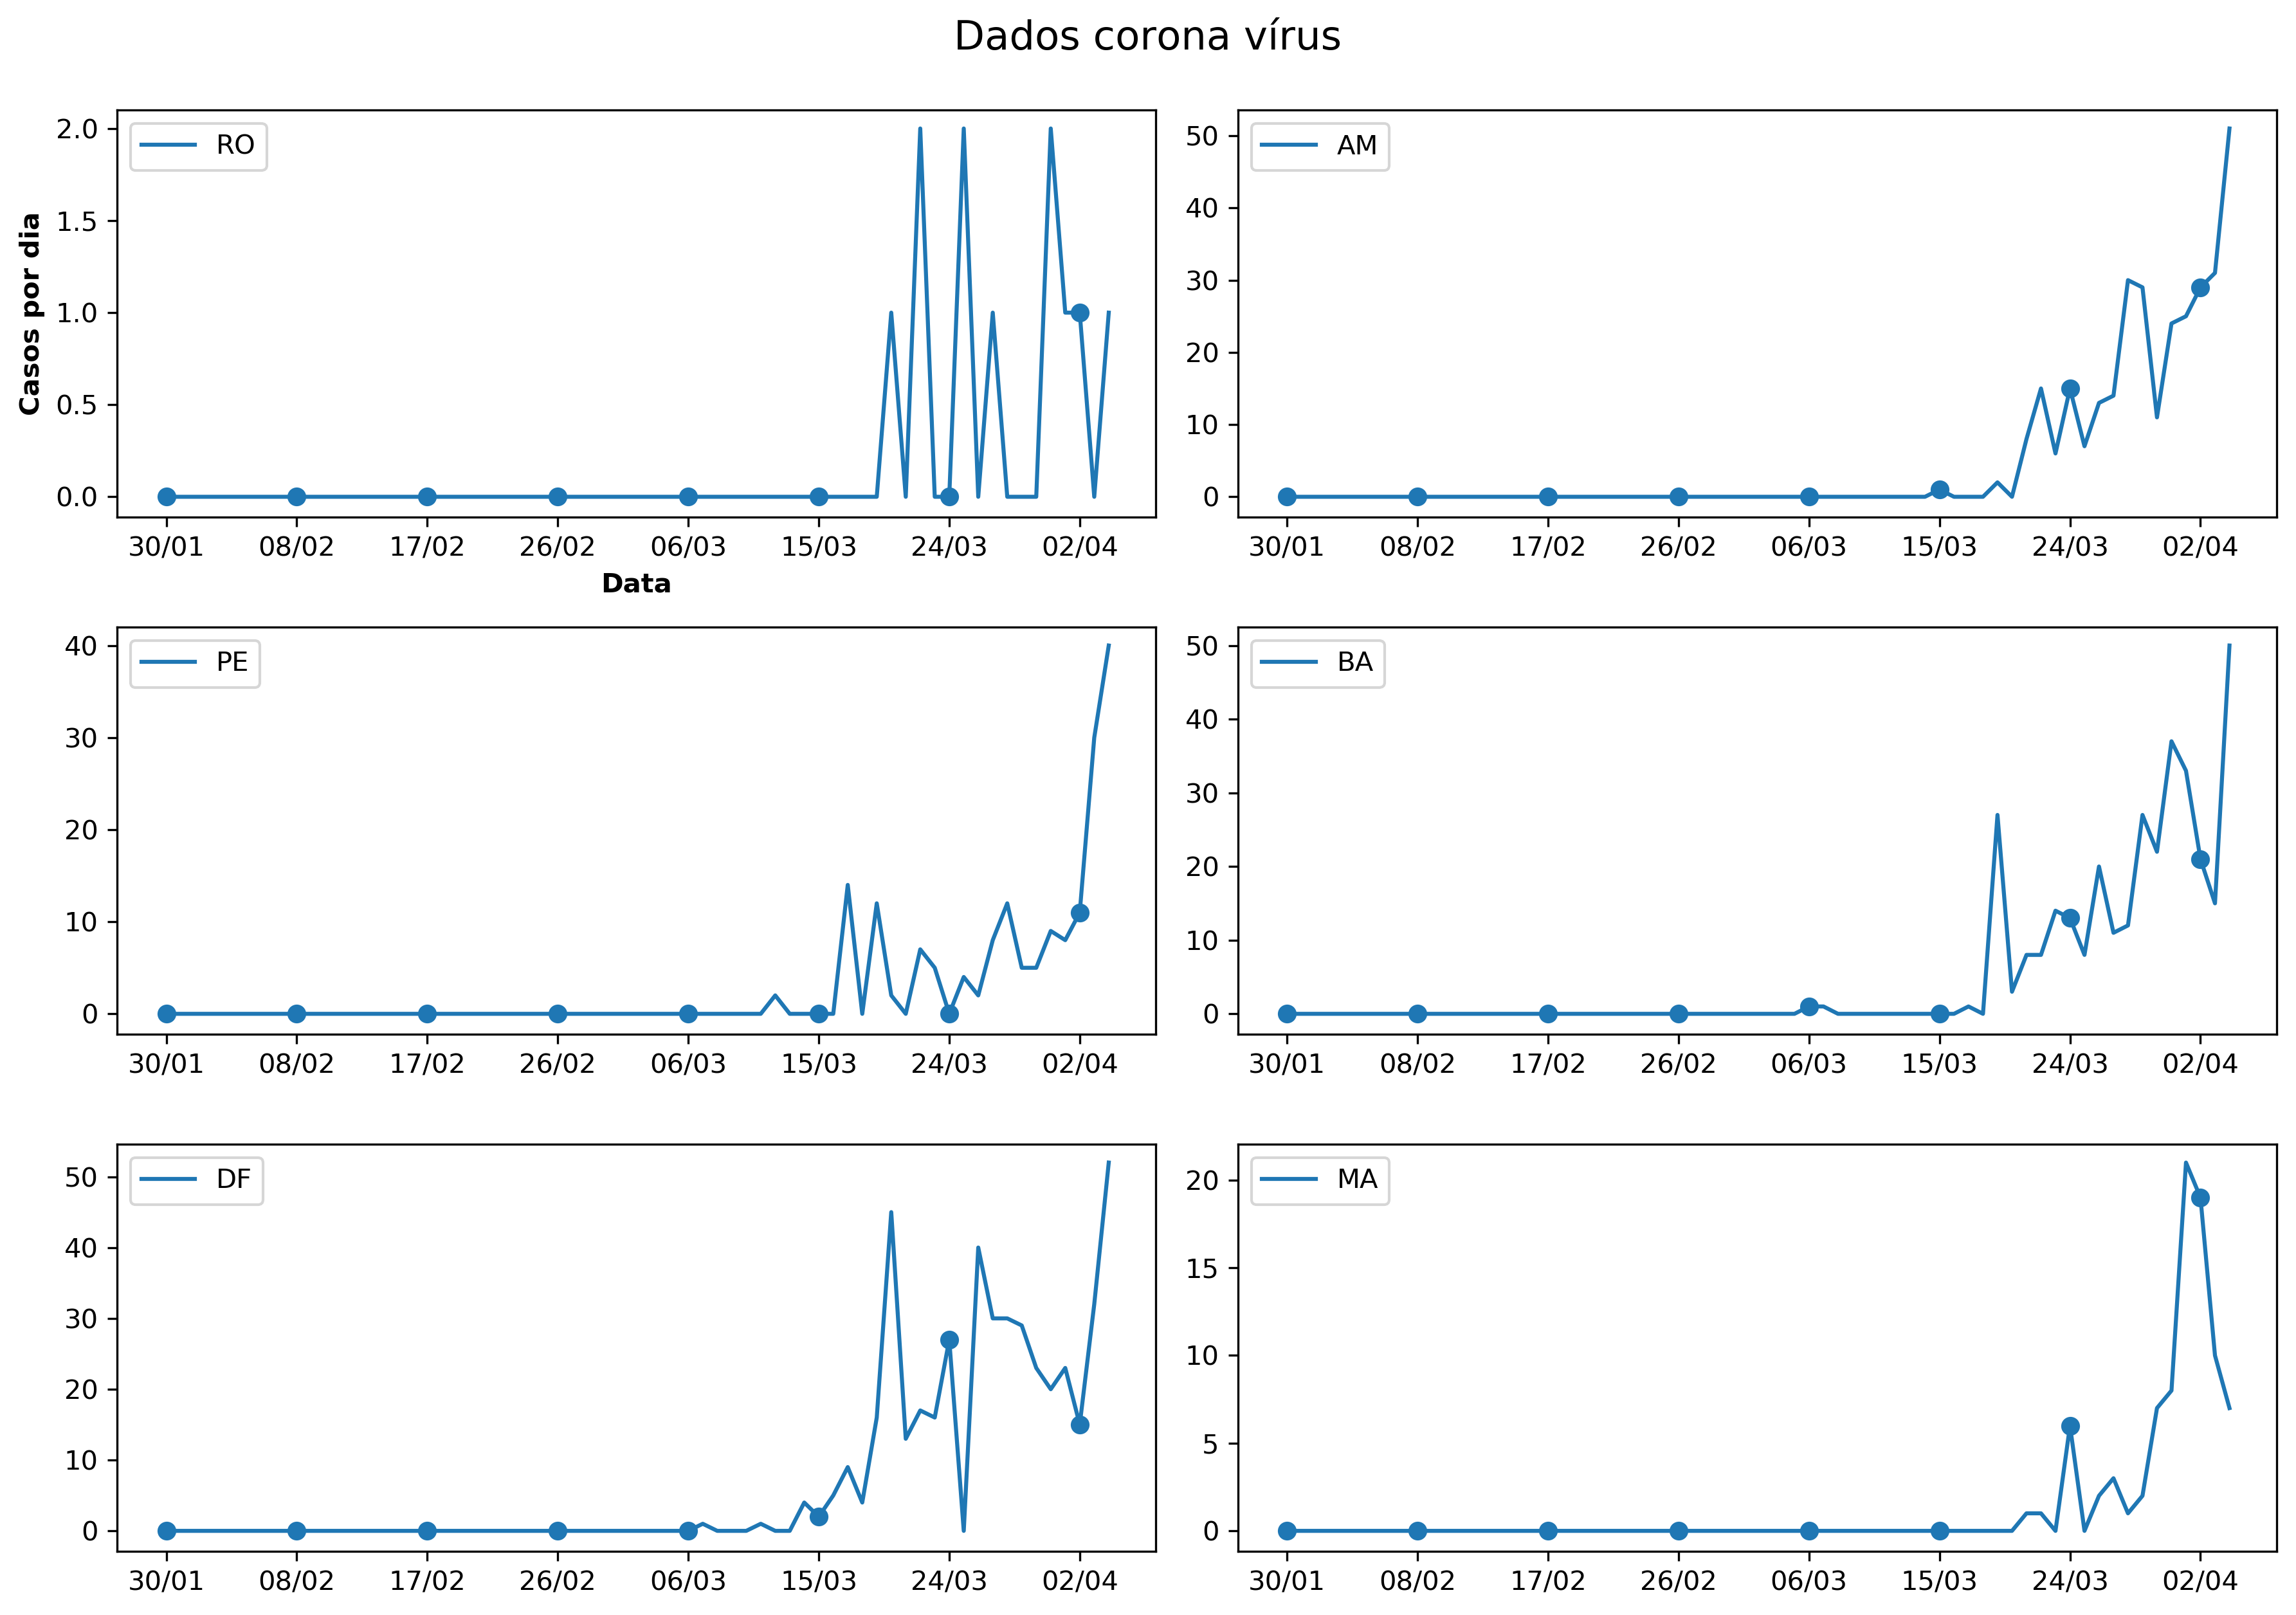

In [191]:
plot_new_cases_by_state_per_day(['RO', 'AM', 'PE', 'BA', 'DF', 'MA'], True, True)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None]
  color or c: color
  contains: callable
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font_properties: `.font_manager.FontProperties`
  fontsize or size: {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  fontweight or w

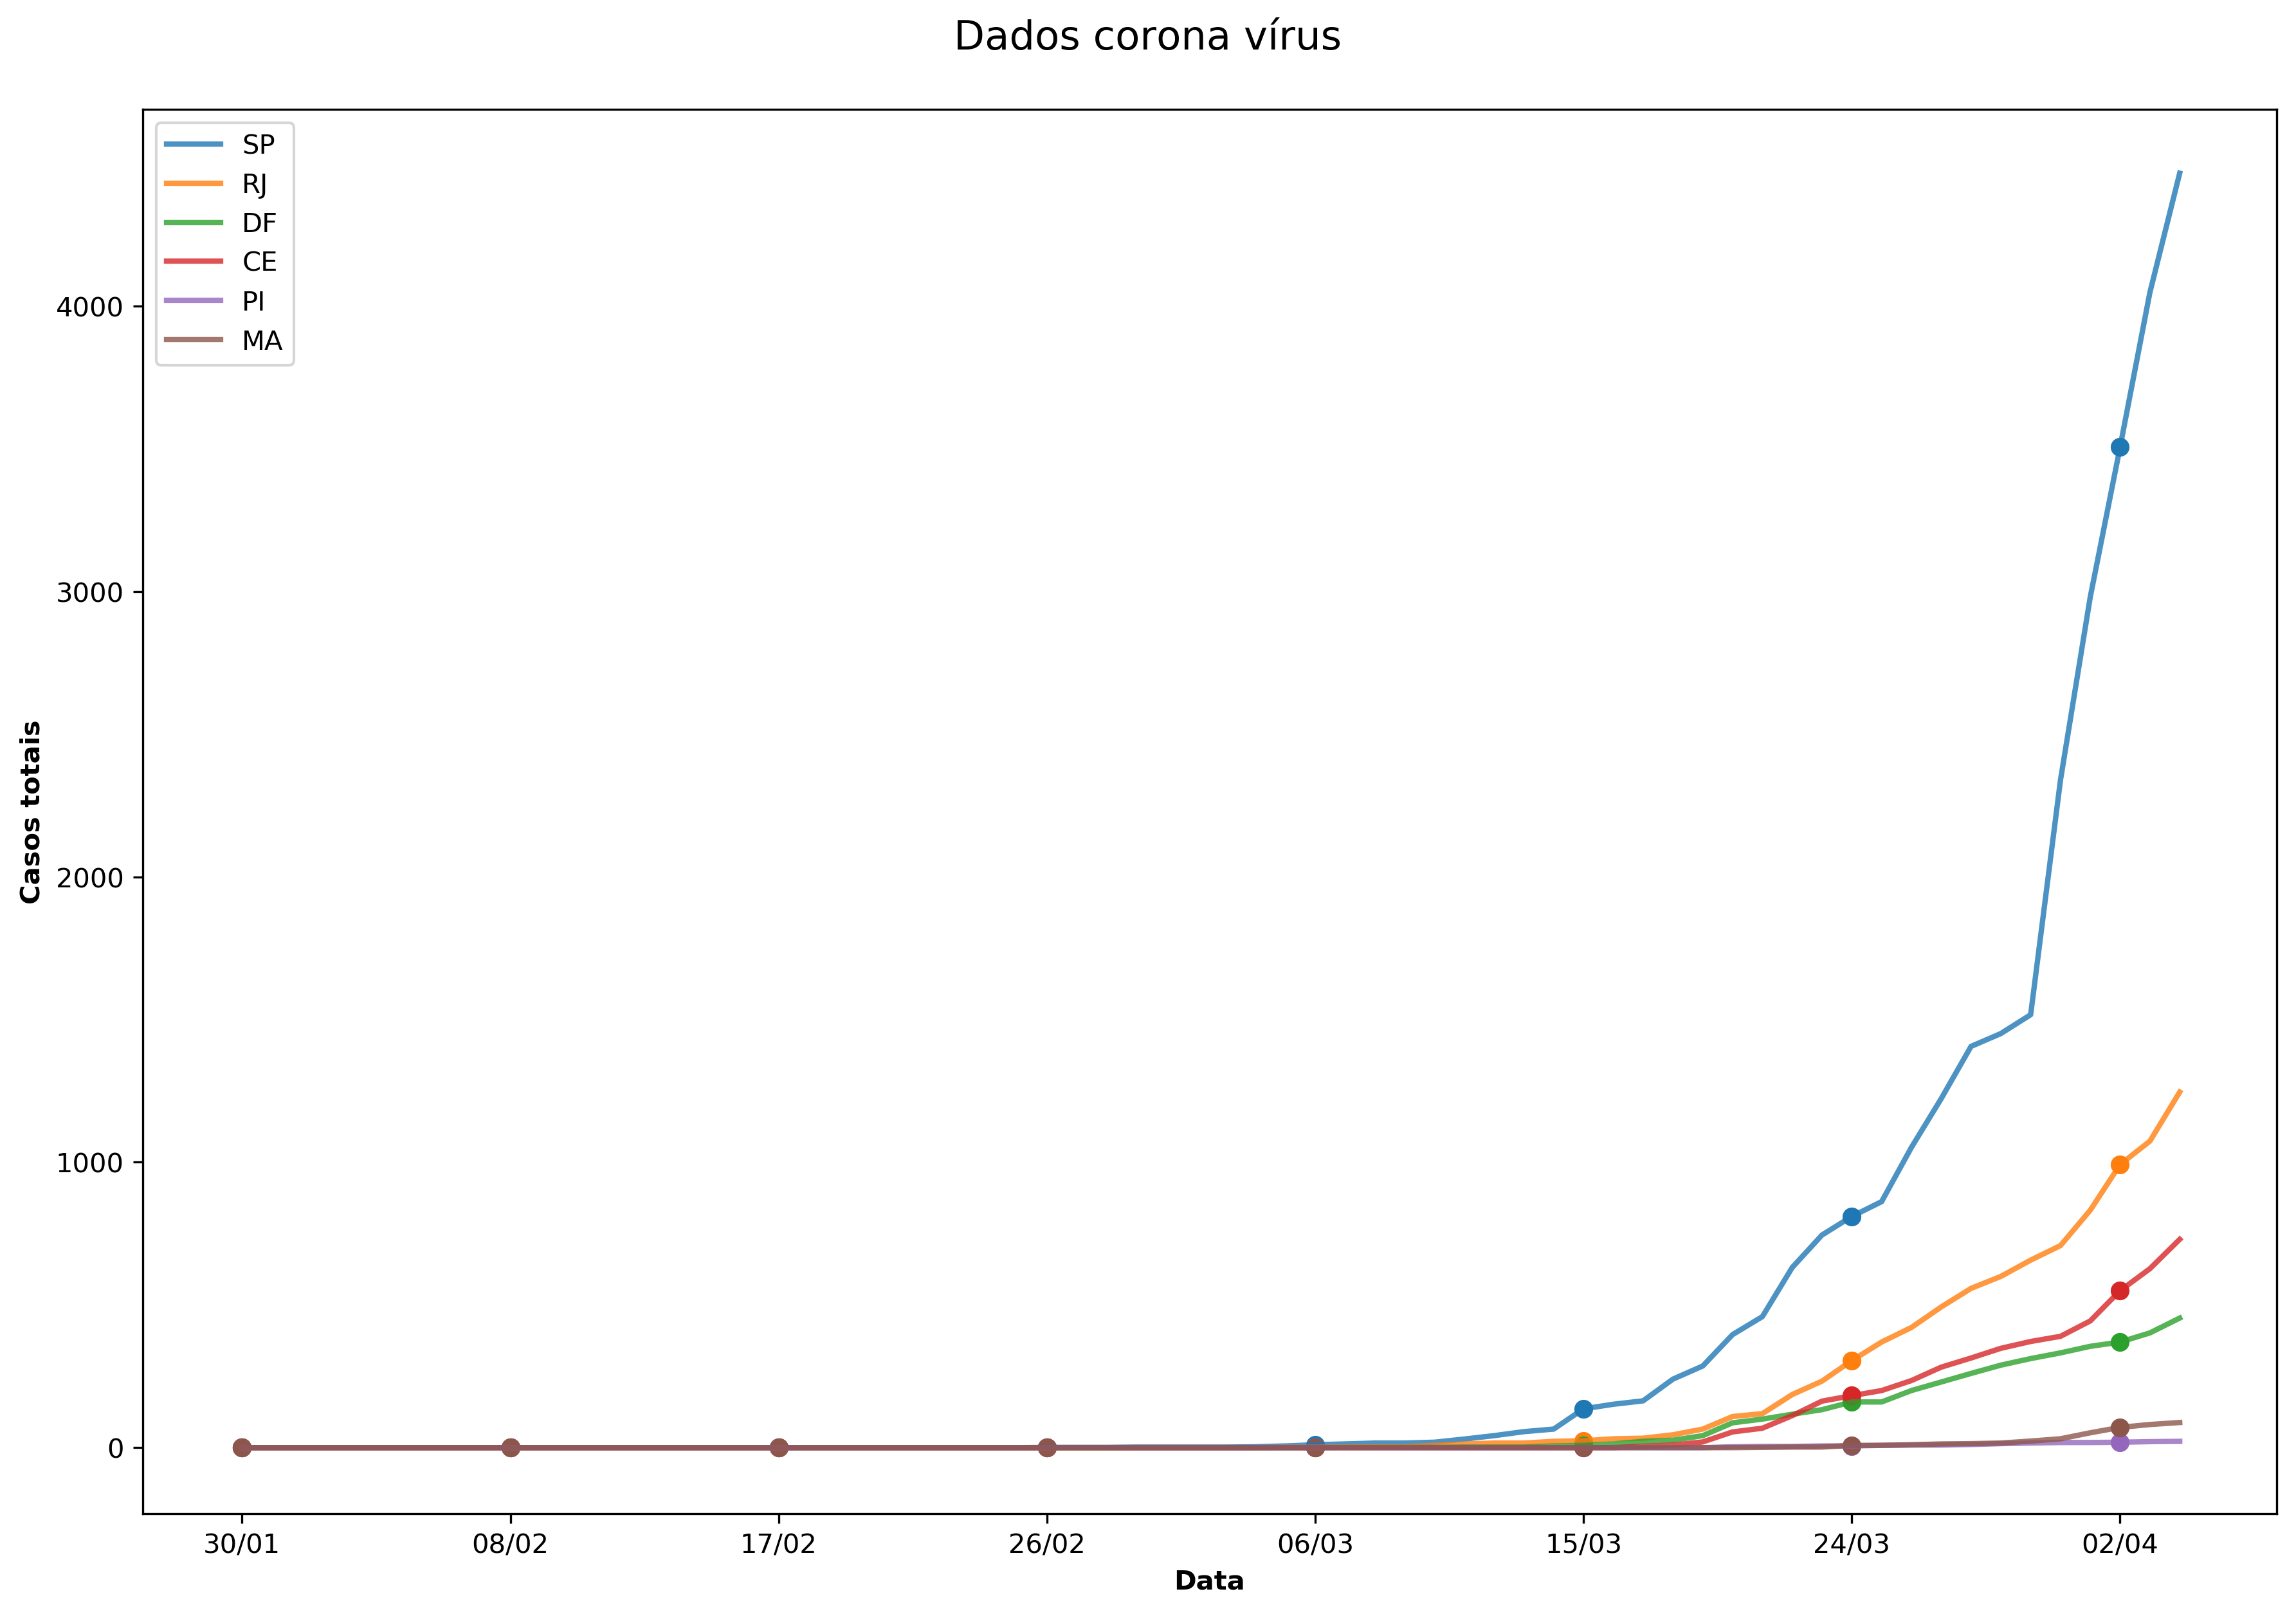

In [192]:
plot_accumulated_cases_by_state(['SP', 'RJ', 'DF', 'CE', 'PI', 'MA'], False, True)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None]
  color or c: color
  contains: callable
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font_properties: `.font_manager.FontProperties`
  fontsize or size: {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  fontweight or w

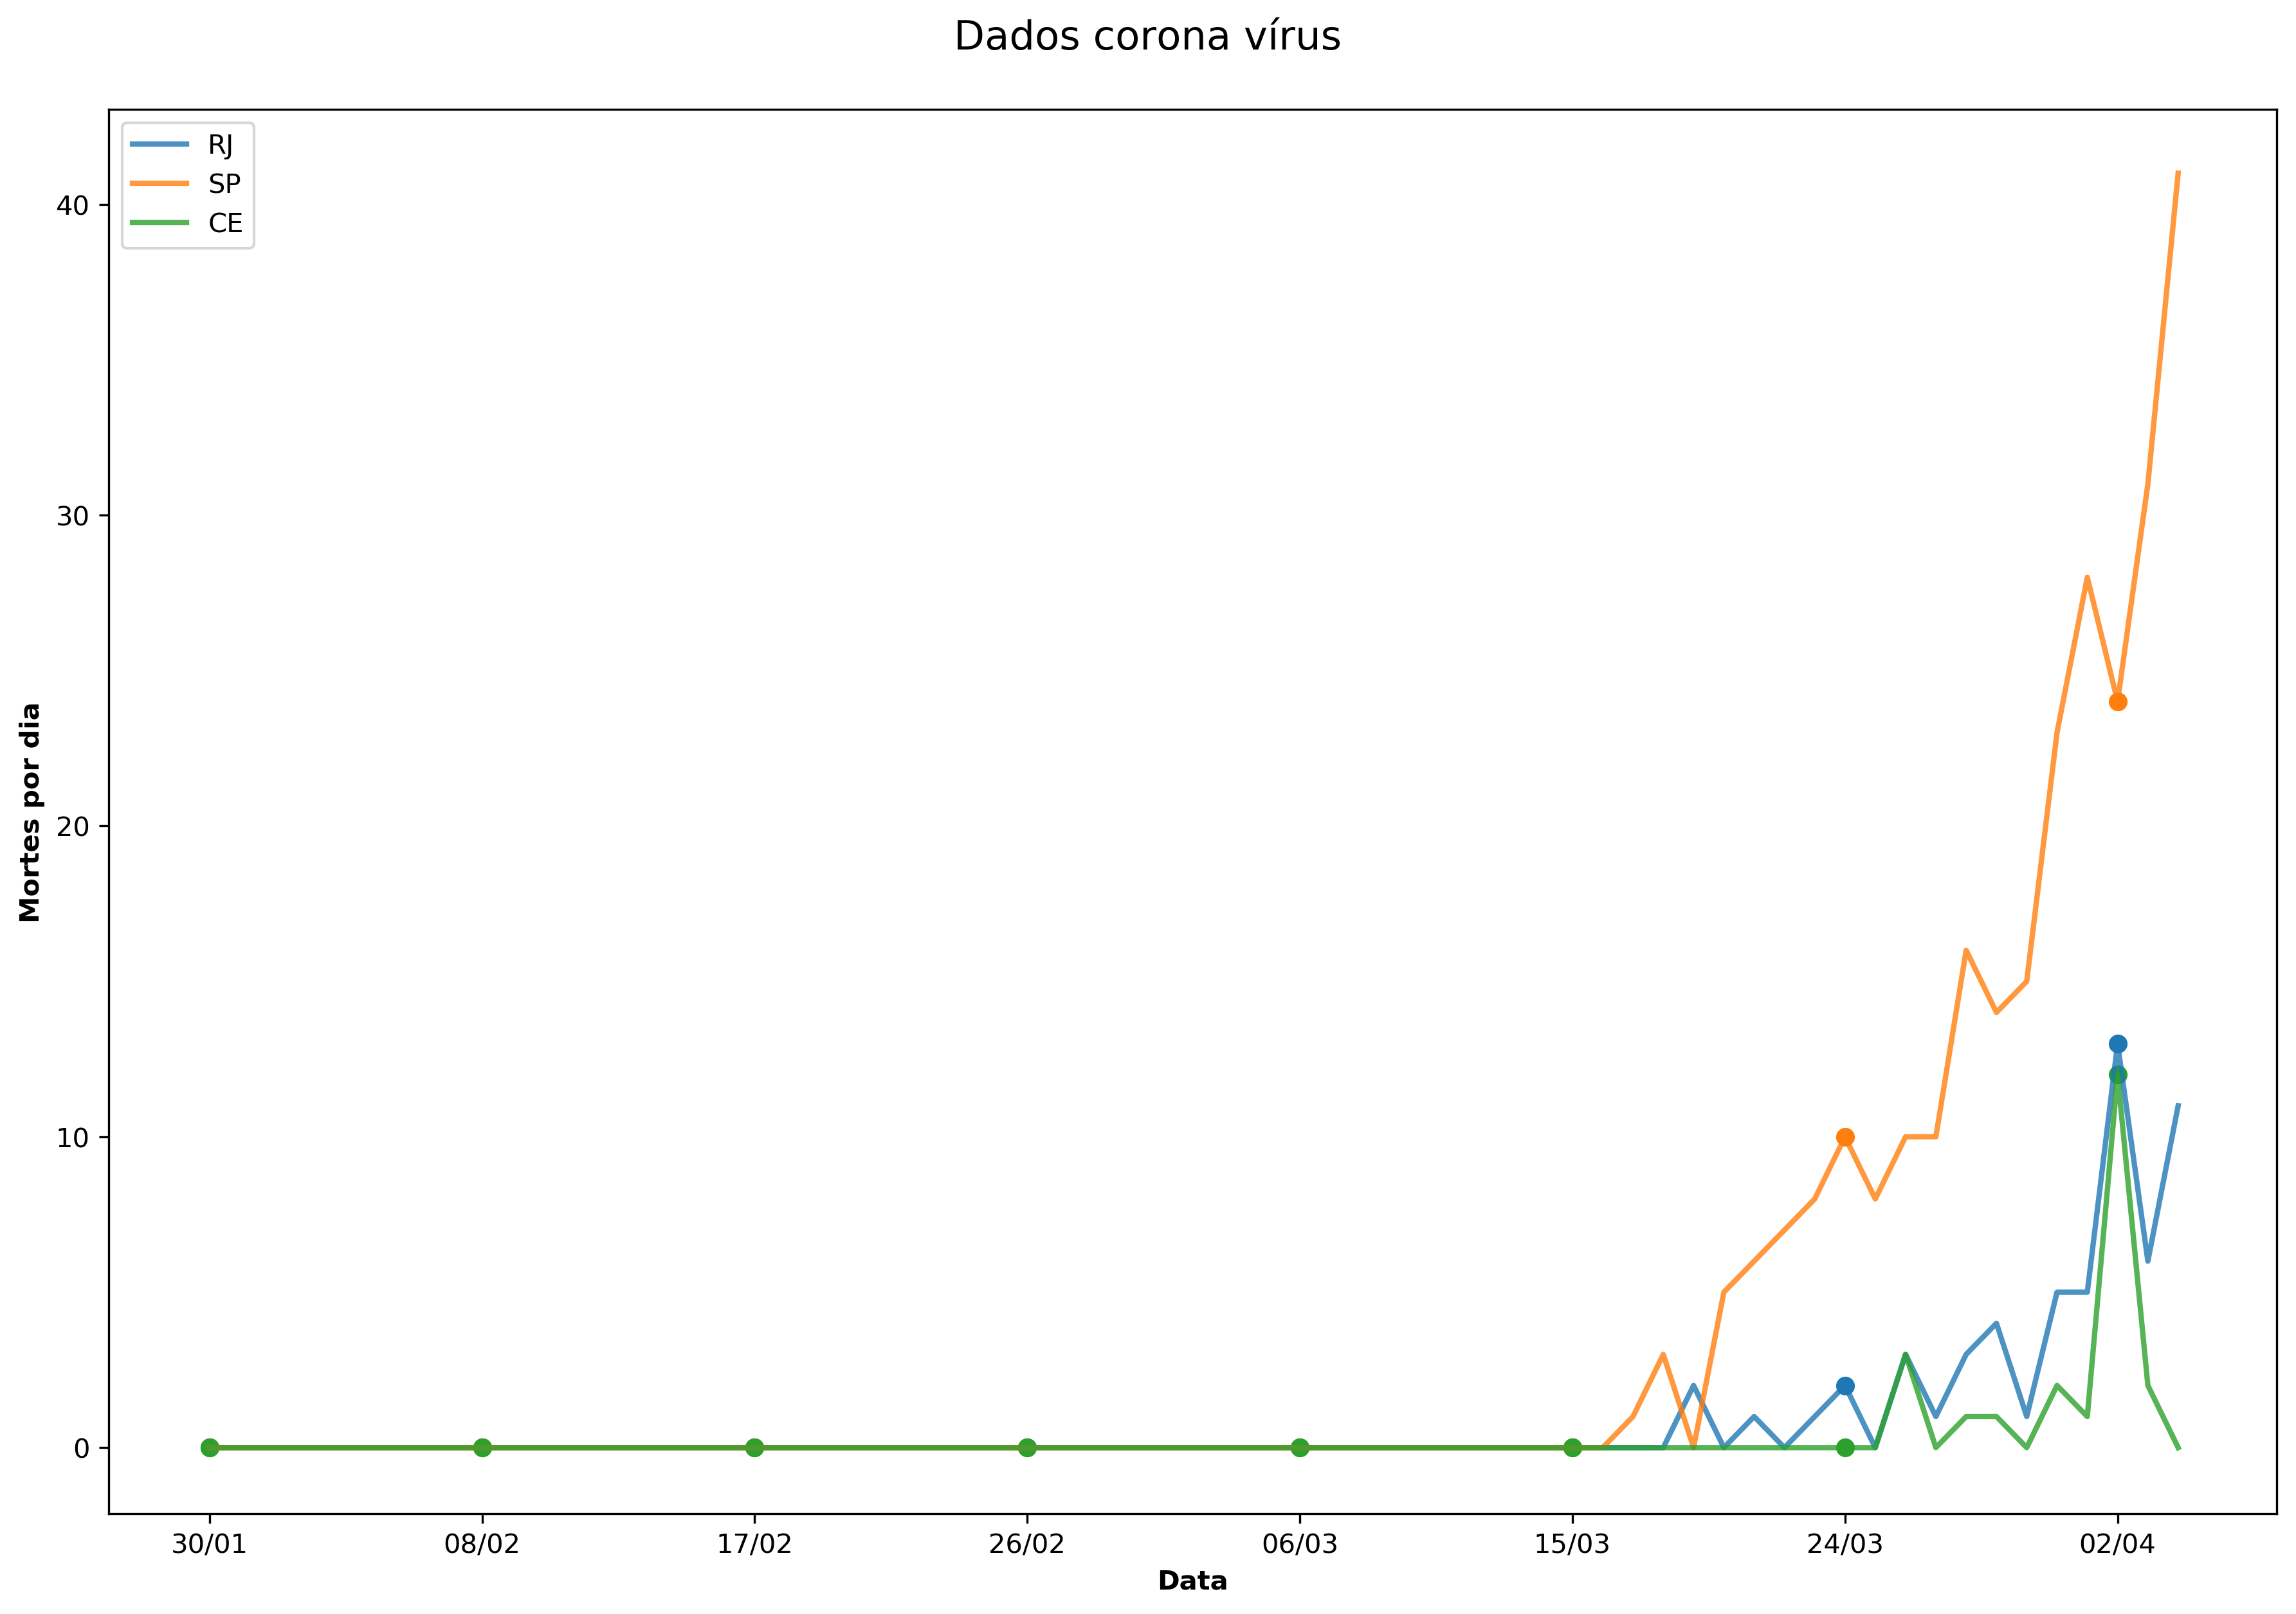

In [194]:
plot_new_deaths_by_state_per_day(['RJ', 'SP', 'CE'], savefig=True)